# Adding .qpdata files with annotations to the a QuPath project

# Extraction annotations from a QuPath project

In [18]:
from pathlib import Path
import re
import json

import numpy as np
# import pyvips
import cv2
from rasterio.features import shapes
from shapely.geometry import Polygon
import geopandas as gp
from matplotlib import pyplot as plt
from paquo.projects import QuPathProject


from IPython.display import clear_output
%matplotlib inline

In [1]:
# !paquo config --search-tree
# !python -m paquo config --search-tree

In [2]:
#!python -m paquo config --list --default

In [3]:
#!paquo config -l

In [4]:
#import os 
#os.listdir("C:/Users/Studente/AppData/Local/QuPath-0.5.1/app")

In [ ]:
#!paquo config --list --default

In [ ]:
#!pip3 install matplotlib


In [ ]:
#!pip3 install geopandas

In [5]:
# !pip3 install paquo

In [6]:
# !pip3 install rasterio

In [7]:
#!pip3 install pyvips

In [ ]:
#!pip3 install opencv-python

In [ ]:
#import pyvips
#THIS DOESN'T WORK

In [8]:
#!echo $PKG_CONFIG_PATH

In [12]:
from pathlib import Path
import re
import json

import numpy as np
# import pyvips
import cv2
from rasterio.features import shapes
from shapely.geometry import Polygon
import geopandas as gp
from matplotlib import pyplot as plt
from paquo.projects import QuPathProject


In [13]:
# let's open the QuPath project

qpproj_path = Path('/Users/vitaly/Lehre/WS2425/Falken/data/qpath')

qp = QuPathProject(qpproj_path)

QuPathProject(path="/Users/vitaly/Lehre/WS2425/Falken/data/qpath/project.qpproj" mode="r")
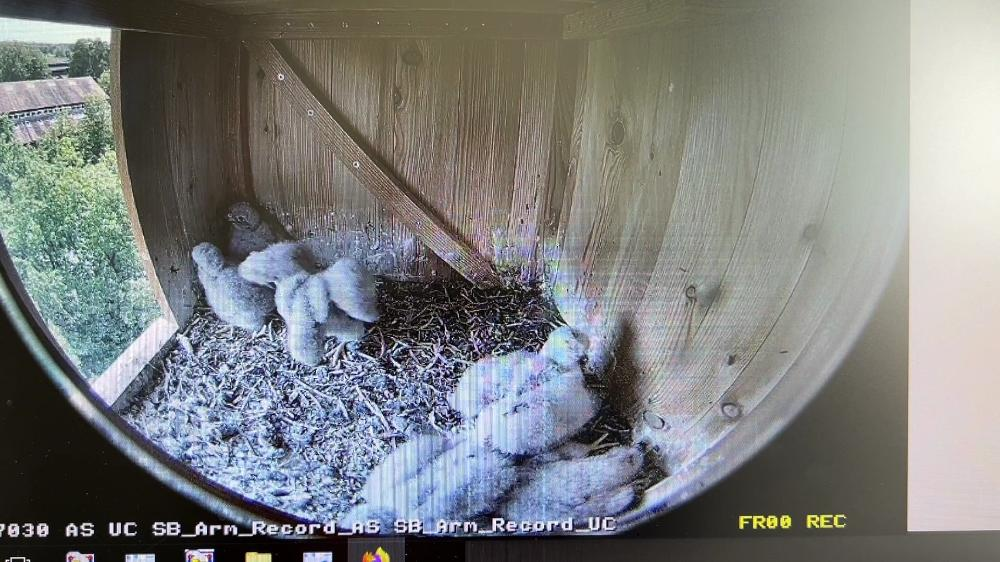
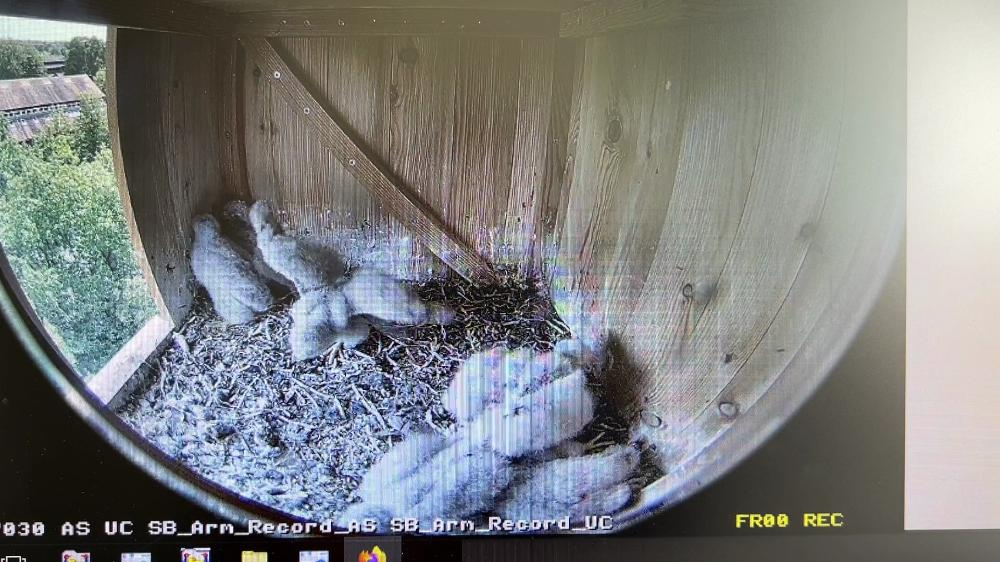
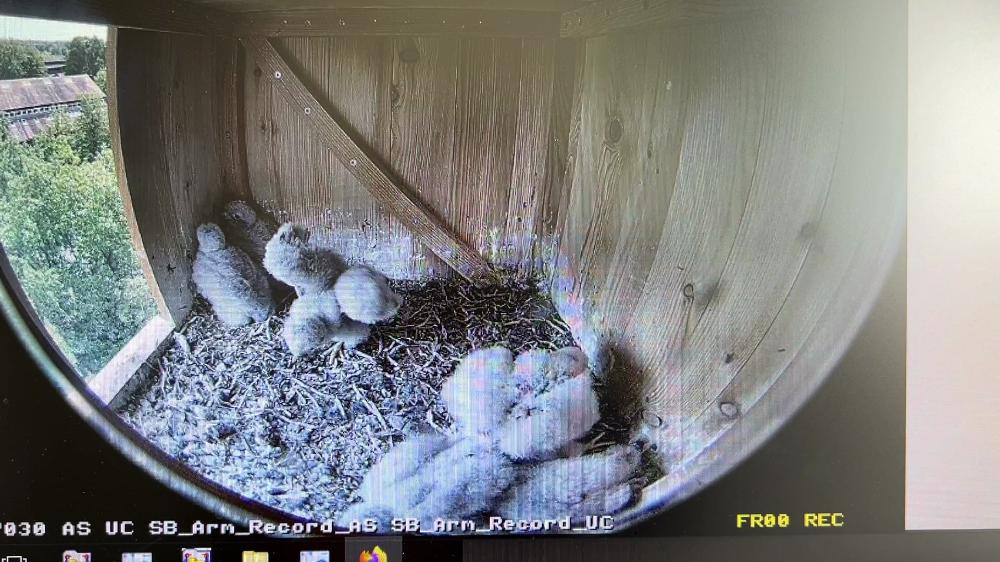
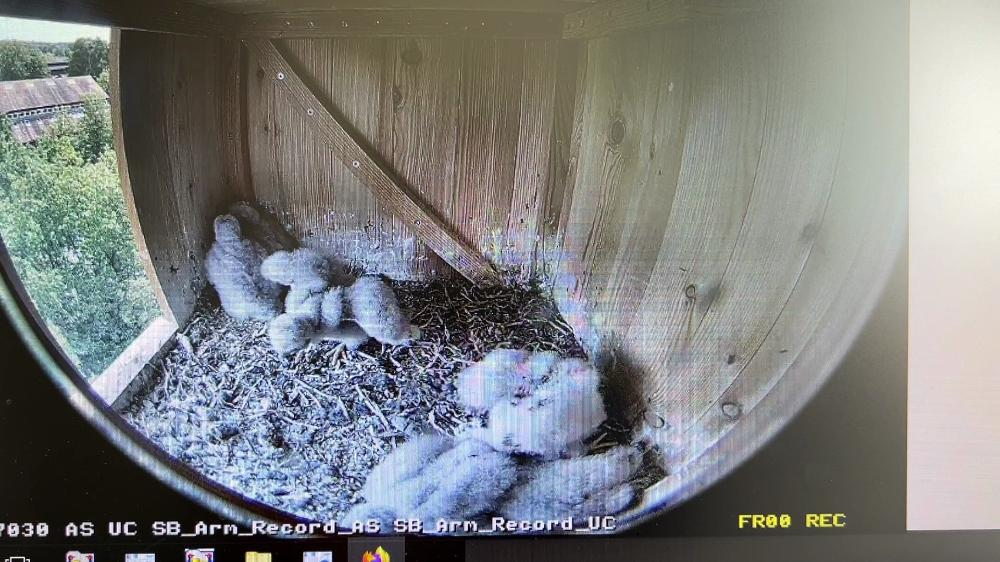
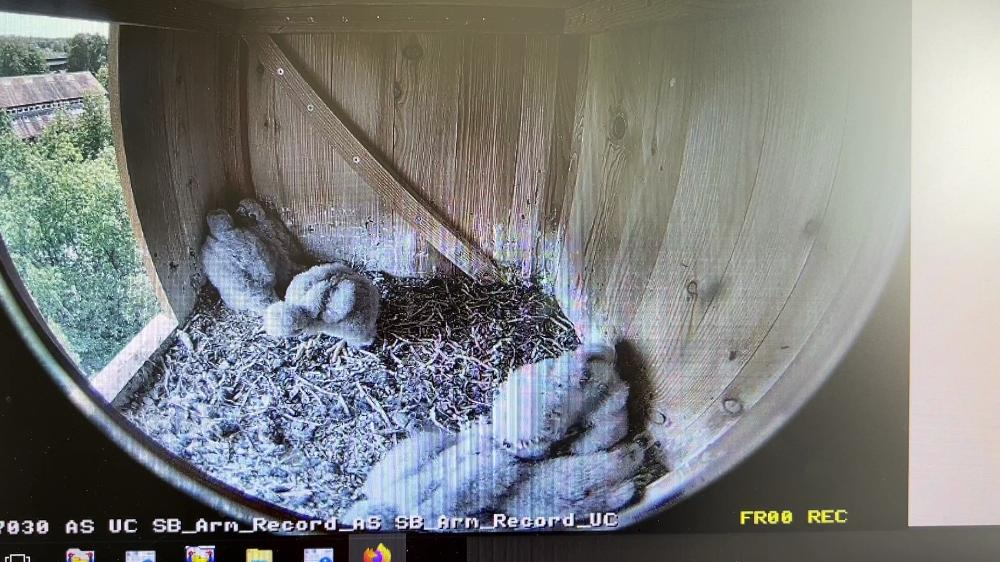

In [14]:
# let check what is inside

qp

In [15]:
# https://paquo.readthedocs.io/en/latest/quickstart.html

In [16]:
# i=9500
j=0

image = qp.images[j]
image.hierarchy.annotations


11:41:12.650 [main] [DEBUG] qupath.lib.io.PathIO - Read: {"dataVersion":3,"qupathVersion":"0.5.1","server":{"builderType":"uri","providerClassName":"qupath.lib.images.servers.bioformats.BioFormatsServerBuilder","uri":"file:/Users/vitaly/Lehre/WS2425/Falken/data/segment/0/2024-05-21_14:25:48_%C3%9Cben.MOV_15.jpg","args":["--series","0"],"metadata":{"name":"2024-05-21_14:25:48_Üben.MOV_15.jpg","width":1920,"height":1080,"sizeZ":1,"sizeT":1,"channelType":"DEFAULT","isRGB":true,"pixelType":"UINT8","levels":[{"downsample":1.0,"width":1920,"height":1080}],"channels":[{"name":"Red","color":-65536},{"name":"Green","color":-16711936},{"name":"Blue","color":-16776961}],"pixelCalibration":{"pixelWidth":{"value":1.0,"unit":"px"},"pixelHeight":{"value":1.0,"unit":"px"},"zSpacing":{"value":1.0,"unit":"z-slice"},"timeUnit":"SECONDS","timepoints":[]},"preferredTileWidth":1920,"preferredTileHeight":1080}},"id":"BioFormatsImageServer: file:/Users/vitaly/Lehre/WS2425/Falken/data/segment/0/2024-05-21_14:

<PathObjectProxy hierarchy=Hierarchy(image=2024-05-21_14:25:48_Üben.MOV_15.jpg, annotations=2, detections=0) paquo_cls=QuPathPathAnnotationObject mask=None at 0x0xb508ef0b0>

In [17]:
for el in image.hierarchy.annotations:
    # print(el.__dir__())
    u = el.to_geojson()
    print(u['geometry'])
    # print(el['geometry'])
    # for x in el:
    #     print(x)

{'type': 'Polygon', 'coordinates': [[[1071, 627], [1066, 628], [1065, 628], [1062, 630], [1061, 630], [1061, 631], [1059, 631], [1059, 633], [1058, 633], [1058, 634], [1058, 635], [1058, 637], [1056, 638], [1056, 640], [1056, 641], [1055, 641], [1055, 643], [1055, 644], [1053, 644], [1053, 646], [1052, 646], [1052, 647], [1050, 647], [1050, 649], [1050, 650], [1049, 650], [1049, 651], [1047, 651], [1047, 653], [1047, 654], [1046, 654], [1046, 656], [1046, 657], [1045, 659], [1045, 660], [1043, 662], [1043, 663], [1043, 664], [1042, 664], [1042, 666], [1042, 667], [1040, 669], [1040, 670], [1039, 672], [1039, 673], [1037, 675], [1037, 676], [1036, 676], [1036, 678], [1034, 679], [1033, 680], [1031, 680], [1031, 682], [1030, 680], [1029, 680], [1027, 679], [1023, 679], [1021, 678], [1017, 678], [1017, 676], [1014, 676], [1013, 675], [994, 675], [992, 676], [991, 676], [989, 678], [981, 678], [981, 679], [979, 679], [976, 680], [975, 680], [972, 682], [970, 682], [967, 683], [963, 683], [

In [22]:
image.image_name

'2024-05-21_14:25:48_Üben.MOV_15.jpg'

In [19]:
# Example of storing the extracted classes information, 
# coordinates and their centroids in json format

directory = 'C:/Users/Studente/Desktop/hens_txt/'
for image in qp.images:
    fname=image.image_name
    name = re.split('\.', fname)[0]
    output_file = directory + name + '.txt'
    print(output_file)
    # Save annotations
    with open(output_file, 'w') as file:
        for i, annotation in enumerate(image.hierarchy.annotations):
            try:
                u = annotation.to_geojson()
                v = u['properties'].get('classification', {}).get('name', 'Unknown')
                #cc_x, cc_y, larg, h = u['geometry']['coordinates'][0][0], u['geometry']['coordinates'][0][1], u['geometry']['coordinates'][0][2], u['geometry']['coordinates'][0][3]
                for sotto_lista in u['geometry']['coordinates']:
                    cc_x=(sotto_lista[0][0]+sotto_lista[1][0]+sotto_lista[2][0]+sotto_lista[3][0])/4
                    if cc_x<0:
                        cc_x=-cc_x
                    cc_y=(sotto_lista[0][1]+sotto_lista[1][1]+sotto_lista[2][1]+sotto_lista[3][1])/4
                    if cc_y<0:
                        cc_y=-cc_y
                    larg= sotto_lista[1][1]-sotto_lista[1][0]
                    if larg<0:
                        larg=-larg
                    h= sotto_lista[2][0]-sotto_lista[3][0]
                    if h<0:
                        h=-h

                file.write(f"{v} {cc_x/1920} {cc_y/1080} {larg/1920} {h/1080}\n")
                #file.write(f"{v} {cc_x} {cc_y} {larg} {h}\n")
            except KeyError:
                print(f"Skipping annotation {i} due to missing classification information.")
                continue


C:/Users/Studente/Desktop/hens_txt/2024-05-21_14:25:48_Üben.txt


<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/7b/vjhrgxr52nd83g6293wmjnsr0000gn/T/ipykernel_12656/2224315533.py:7: SyntaxWarning: invalid escape sequence '\.'
  name = re.split('\.', fname)[0]
/var/folders/7b/vjhrgxr52nd83g6293wmjnsr0000gn/T/ipykernel_12656/2224315533.py:7: SyntaxWarning: invalid escape sequence '\.'
  name = re.split('\.', fname)[0]


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Studente/Desktop/hens_txt/2024-05-21_14:25:48_Üben.txt'

In [20]:
directory = 'C:/Users/Studente/Desktop/hens_cc/'
for image in qp.images:
    fname = image.image_name
    name = re.split('.', fname)[0]
    output_file = directory + name + '.txt'
    print(output_file)
    # Save annotations
    with open(output_file, 'w') as file:
        for i, annotation in enumerate(image.hierarchy.annotations):
            try:
                u = annotation.to_geojson()
                v = u['properties'].get('classification', {}).get('name', 'Unknown')
                for sotto_lista in u['geometry']['coordinates']:
                    file.write(f"{v} {sotto_lista[0][0]} {sotto_lista[0][1]} {sotto_lista[1][0]} {sotto_lista[1][1]} {sotto_lista[2][0]} {sotto_lista[2][1]} {sotto_lista[3][0]} {sotto_lista[3][1]}\n")
            except KeyError:
                print(f"Skipping annotation {i} due to missing classification information.")
                continue

C:/Users/Studente/Desktop/hens_cc/.txt


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Studente/Desktop/hens_cc/.txt'

In [ ]:

#CODICE SBAGLIATO (VECCHIO)

directory = 'C:/Users/Studente/Desktop/Hens_txt'
os.makedirs(directory, exist_ok=True)

# file name
output_file = os.path.join(directory, f'name{i}.txt')

# Save annotations
with open(output_file, 'w') as file:
    for i, annotation in enumerate(image.hierarchy.annotations):
        try:
            u = annotation.to_geojson()
            v = u['properties'].get('classification', {}).get('name', 'Unknown')
            #cc_x, cc_y, larg, h = u['geometry']['coordinates'][0][0], u['geometry']['coordinates'][0][1], u['geometry']['coordinates'][0][2], u['geometry']['coordinates'][0][3]
            for sotto_lista in u['geometry']['coordinates']:
                cc_x=(sotto_lista[0][0]+sotto_lista[1][0]+sotto_lista[2][0]+sotto_lista[3][0])/4
                if cc_x<0:
                    cc_x=-cc_x
                cc_y=(sotto_lista[0][1]+sotto_lista[1][1]+sotto_lista[2][1]+sotto_lista[3][1])/4
                if cc_y<0:
                    cc_y=-cc_y
                larg= sotto_lista[1][1]-sotto_lista[1][0]
                if larg<0:
                    larg=-larg
                h= sotto_lista[2][0]-sotto_lista[3][0]
                if h<0:
                    h=-h

            #file.write(f"{v} {cc_x/1920} {cc_y/1080} {larg/1920} {h/1080}\n")
            file.write(f"{v} {cc_x} {cc_y} {larg} {h}\n")
        except KeyError:
            print(f"Skipping annotation {i} due to missing classification information.")
            continue


In [ ]:
u

In [ ]:
u = annotation.to_geojson()

In [ ]:
u['geometry']['coordinates']